<h1>ALA 470 Final Project</h1>
Haley Johnson

In [101]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

<h2>Load Data</h2>

In [59]:
df_1 = pd.read_csv("fake.csv")
df_2 = pd.read_csv("news_articles.csv")

<h2>Clean Up</h2>

In [31]:
df_1['title'] = df_1['title'].str.lower()
df_1['author'] = df_1['author'].str.lower()

In [32]:
df_1 = df_1.drop(columns = {'language', 'site_url', 'main_img_url', 'type', 'published', 'text'}, axis = 1)

In [33]:
df_2['title'] = df_2['title'].str.lower()
df_2['author'] = df_2['author'].str.lower()

In [52]:
df = df_1.merge(df_2, on = ['title', 'author'])

<h2>NLTK</h2>

In [60]:
df = df_1

<h3>Tokenize</h3>

In [69]:
df['text'] = df['text'].astype(str)

In [70]:
df['text_normalized'] = df['text'].str.lower()

In [72]:
df['words'] = df['text_normalized'].apply(nltk.word_tokenize)

In [73]:
stop_words = stopwords.words('english')
df['non_stopwords'] = df['words'].apply(lambda x: [w for w in x if w not in stop_words])
df['non_stopwords_count'] = df['non_stopwords'].apply(len)

<h3>Named Entity Recognition</h3>

In [74]:
def get_people(s):
    people = []
    tokens = nltk.word_tokenize(s)
    tagged = nltk.pos_tag(tokens)
    entities = nltk.chunk.ne_chunk(tagged)

    for entity in entities.subtrees():
        if entity.label() == "PERSON":
            name = []
            for leaf in entity.leaves():
                name.append(leaf[0])
            people.append(" ".join(name))
    return people

In [77]:
df['Persons'] = df['text_normalized'].apply(get_people)

<h2>Plotting Tokens</h2>

In [87]:
types = list(df['type'].unique())

In [ ]:
top_tokens = []
for i in range(len(types)):
    matches = df[df['type'] == types[i]]
    exploded_tokens = df.explode('non_stopwords')
    exploded_tokens = exploded_tokens[pd.isnull(exploded_tokens['non_stopwords']) == False]
    top_tokens.append(exploded_tokens['non_stopwords'].value_counts())

<h2>Visualize</h2>

In [117]:
top = []
for i in range(len(types)):
    matches = df[df['type'] == types[i]]
    exploded = matches.explode('Persons')
    exploded = exploded[pd.isnull(exploded['Persons']) == False]
    top.append(exploded['Persons'].value_counts())

In [120]:
fake = top[2]
top = top[:2] + top[3:]

/Users/haleyjohnson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/haleyjohnson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/haleyjohnson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/haleyjohnson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/haleyjohnson/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/haleyjohnson/opt/anaconda3/lib/py

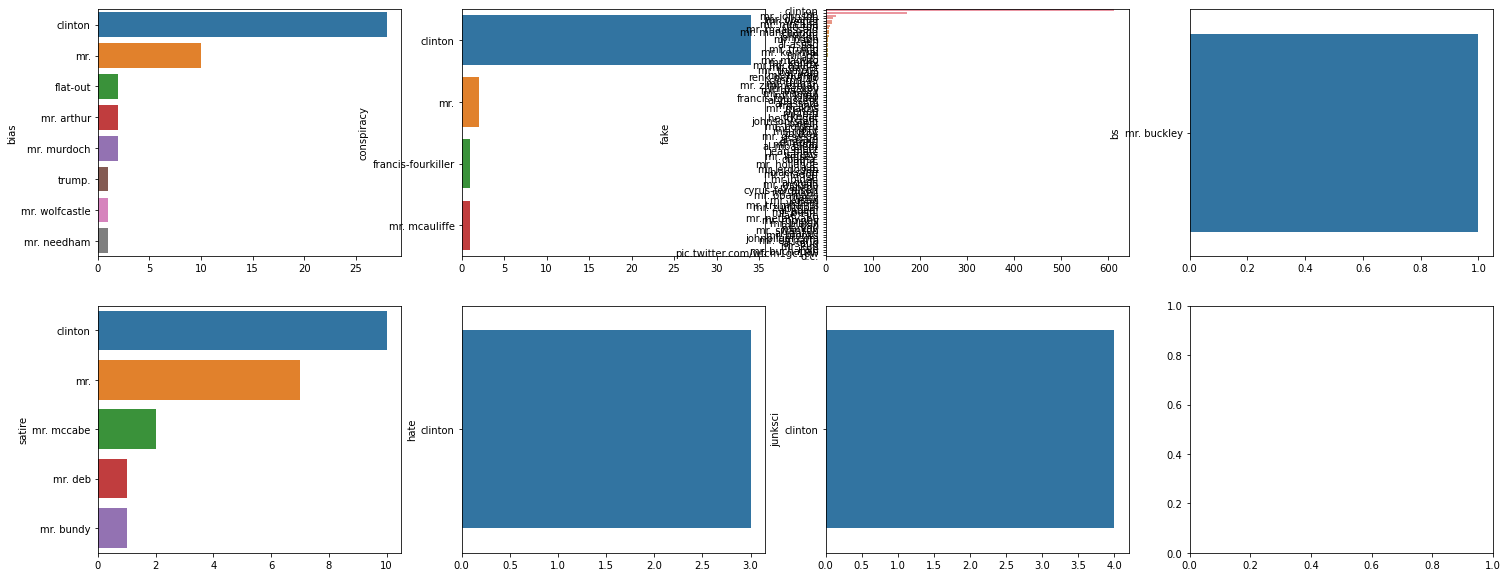

In [121]:
fig, axes = plt.subplots(2, 4)
fig.set_size_inches(25, 10)

for i, ax in enumerate(axes.flatten()):
    if i == 7:
        break
    t = types[i]
    grid = sns.barplot(x = top[i].values, y = top[i].index, ax = ax)
    grid.set(ylabel = t)
    

In [113]:
top[2]

Series([], Name: Persons, dtype: int64)